In [1]:
from pennylane import numpy as np
import pennylane as qml
from matplotlib import pyplot as plt
import networkx as nx
import tensorflow as tf

In [2]:
H=qml.Hadamard._matrix()
print(H)
#print(np.array([[ 0.94877869,  0.31594146], [-0.31594146,  0.94877869]]))

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
[[ 0.94877869  0.31594146]
 [-0.31594146  0.94877869]]


In [71]:
dev=qml.device("default.qubit",wires=2)
@qml.qnode(dev)
def circuit(params,part=None):
    l=params
    qml.Hadamard(wires=0)
    if part=="Im" or part=="im":
        qml.PhaseShift(-np.pi/2,wires=0)
    qml.CRot(l[0],l[1],l[2],wires=[0,1])
    qml.ControlledQubitUnitary(qml.Hadamard._matrix(),control_wires=0,wires=1)
    qml.Hadamard(wires=0)
    
    return qml.expval(qml.PauliZ(0))
def exp(params):
    c_r=circuit(params,part="re")
    c_im=circuit(params,part="im")
    
    return c_r + 1.0j*c_im

dev2=qml.device("default.qubit",wires=2)
@qml.qnode(dev2)
def circuit2(params,part=None):
    l=params
    qml.BasisState(np.array([0,1], requires_grad=False), wires=[0,1])
    qml.Hadamard(wires=0)
    if part=="Im" or part=="im":
        qml.PhaseShift(-np.pi/2,wires=0)
        
    qml.CRot(l[0],l[1],l[2],wires=[0,1])
    qml.ControlledQubitUnitary(qml.Hadamard._matrix(),control_wires=0,wires=1)
    qml.Hadamard(wires=0)
    
    return qml.expval(qml.PauliZ(0))
def exp2(params):
    c_r=circuit2(params,part="re")
    c_im=circuit2(params,part="im")
    
    return c_r + 1.0j*c_im

In [77]:
def cost1(params,**kwargs):
    return 1/2*(abs(1-exp(params))+abs(1-exp2(params)))

In [78]:
#np.random.seed(0)
init_param=np.random.rand(3)
params=init_param
print(params)

[0.79915856 0.46147936 0.78052918]


In [79]:
cost_history = []
steps=1000
for it in range(steps):
    params, cost = qml.GradientDescentOptimizer(stepsize=0.01).step_and_cost(cost1, params)
    #print("Step {:3d}       Cost_L = {:9.7f}".format(it, cost))
    if (it+1)%100==0:
        
        print("the value of cost at step {:} is {:15f}".format(it+1,cost1(params)))

        cost_history.append(cost)
print(cost)

the value of cost at step 100 is        1.139837
the value of cost at step 200 is        1.114734
the value of cost at step 300 is        1.086010
the value of cost at step 400 is        1.055370
the value of cost at step 500 is        1.027634
the value of cost at step 600 is        1.009651
the value of cost at step 700 is        1.002449
the value of cost at step 800 is        1.000527
the value of cost at step 900 is        1.000107
the value of cost at step 1000 is        1.000021
1.0000215419280518


In [6]:
init_param==params

tensor([False, False, False], requires_grad=True)

In [65]:
dev1=qml.device("default.qubit",wires=1)
@qml.qnode(dev1)
def circuit_prob(params,**kwargs):
    l=params
    qml.BasisState(np.array([0], requires_grad=False), wires=0)
    qml.Rot(l[0],l[1],l[2],wires=0)
    #qml.Hadamard(wires=0)
    #qml.Hadamard(wires=0)
 
    
    return qml.state()   #qml.probs(wires=0) 
#probs =circuit_prob(params)
state =circuit_prob(params)

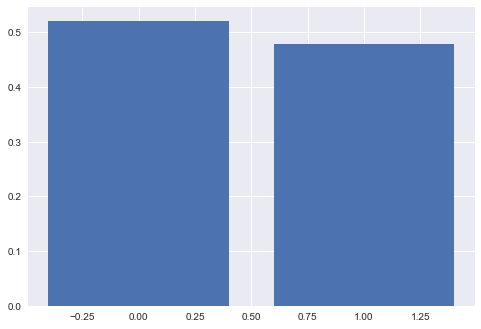

In [10]:
plt.style.use("seaborn")
plt.bar(range(2 ** 1), probs)
plt.show()

In [29]:
abs(state)
print(*params)

0.0024568314151372254 1.5290524696827055 0.0002733399210805718


In [66]:
abs(qml.Rot(params[0],params[1],params[2],wires=0).matrix)
#print(qml.Hadamard.matrix)

array([[0.90419559, 0.42711865],
       [0.42711865, 0.90419559]])

In [ ]:
# post this issue in pennylane discussion forum if not able to solve by yourself

In [45]:
dev=qml.device("default.qubit",wires=1)
@qml.qnode(dev)
def gate(l):
    qml.Rot(l[0],l[1],l[2],wires=0)
    qml.Hadamard(wires=0)
    return qml.expval(qml.PauliZ(0))

def cost1(l):
    return 1-gate(l)

In [46]:
np.random.seed(0)
init_param=np.random.rand(3)
params=init_param
print(params)

[0.5488135  0.71518937 0.60276338]


In [47]:
cost_history = []
steps=1000
for it in range(steps):
    params, cost = qml.GradientDescentOptimizer(stepsize=0.01).step_and_cost(cost1, params)
    #print("Step {:3d}       Cost_L = {:9.7f}".format(it, cost))
    if (it+1)%100==0:
        
        print("the value of cost at step {:} is {:15f}".format(it+1,cost1(params)))

        cost_history.append(cost)
print(cost,params)

the value of cost at step 100 is       -0.961248
the value of cost at step 200 is       -1.443042
the value of cost at step 300 is       -1.862781
the value of cost at step 400 is       -1.979225
the value of cost at step 500 is       -1.997167
the value of cost at step 600 is       -1.999620
the value of cost at step 700 is       -1.999949
the value of cost at step 800 is       -1.999993
the value of cost at step 900 is       -1.999999
the value of cost at step 1000 is       -2.000000
-1.9999998748723071 [ 5.48813504e-01 -1.57040099e+00  2.98301166e-04]


In [50]:
@qml.qnode(dev)
def my_gate(l):
    qml.BasisState(np.array([0], requires_grad=False), wires=0)
    qml.Rot(l[0],l[1],l[2],wires=0)
    #qml.Hadamard(wires=0)
    return qml.state()    #  qml.probs(wires=0)
probs=my_gate(params)


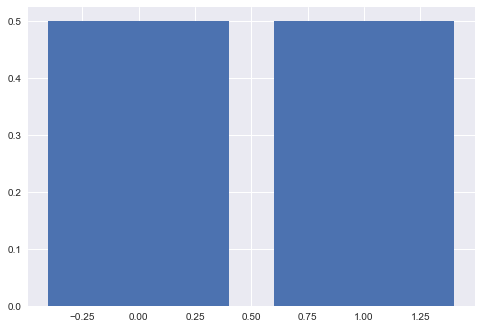

In [35]:
plt.style.use("seaborn")
plt.bar(range(2 ** 1), probs)
plt.show()

In [51]:
probs

tensor([ 0.68075711-0.19174833j, -0.68054518+0.19146954j], requires_grad=True)

In [53]:
qml.Rot(params[0],params[1],params[2],wires=0).matrix

array([[ 0.68075711-0.19174833j,  0.68054518+0.19146954j],
       [-0.68054518+0.19146954j,  0.68075711+0.19174833j]])